<a href="https://colab.research.google.com/github/kre-men/Traffic_Light_Classification/blob/main/Classification_of_two_classes_of_traffic_lights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Classification of two classes of traffic lights

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [ ]:
train_dir = os.path.join('traffic', 'Train')
test_dir = os.path.join('traffic', 'Test')

In [ ]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
)

training_set = data_augmentation.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    # batch_size=32,
    class_mode='binary',
)

validation_set = data_augmentation.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    # batch_size=32,
    class_mode='binary',
)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_set, validation_data=validation_set, epochs=30, steps_per_epoch=len(training_set))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30
5/5 [==============================] - 6s 841ms/step - loss: 1.3799 - accuracy: 0.5312 - val_loss: 0.7663 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 4s 770ms/step - loss: 0.7052 - accuracy: 0.5375 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.6755 - accuracy: 0.5750 - val_loss: 0.8157 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 5s 1s/step - loss: 0.7282 - accuracy: 0.5625 - val_loss: 0.6925 - val_accuracy: 0.6000
Epoch 5/30
5/5 [==============================] - 4s 743ms/step - loss: 0.6795 - accuracy: 0.5688 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 4s 747ms/step - loss: 0.6725 - accuracy: 0.6000 - val_loss: 0.7005 - val_accuracy: 0.4500
Epoch 7/30
5/5 [==============================] - 4s 784ms/step - loss: 0.6371 - accu

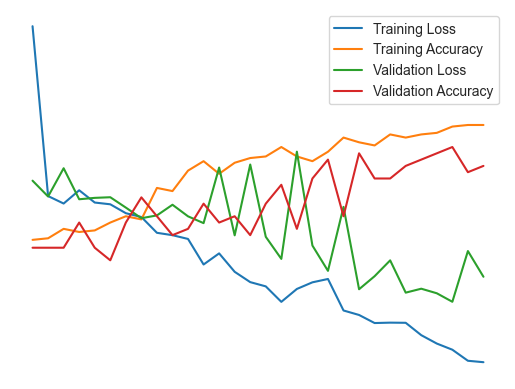

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

In [ ]:
# model.save("models/100_perc_format")

INFO:tensorflow:Assets written to: models/100_perc_format\assets


INFO:tensorflow:Assets written to: models/100_perc_format\assets


In [ ]:
# loaded_model = tf.keras.models.load_model("models/9_from_12_keras_format")

In [ ]:
loaded_model = tf.keras.models.load_model("models/100_perc_format")
test_dir = "traffic/validation"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)
loaded_model.evaluate(test_set)

Found 40 images belonging to 2 classes.
2/2 [==============================] - 1s 38ms/step - loss: 0.6567 - accuracy: 0.9000


[0.6566691994667053, 0.8999999761581421]

In [ ]:
def predict_traffic_light(url, model):
    response = requests.get(url, verify=True)
    img = Image.open(BytesIO(response.content))
    img = img.resize((200, 200))
    array_image = image.img_to_array(img)
    test_image = np.expand_dims(array_image, axis=0)
    print(f'image shape: {test_image.shape}')
    prediction = model.predict(test_image)
    print(f'prediction: {prediction[0][0]:.3f}')
    if prediction[0][0] > 0.5:
        print("It's a red")
    else:
        print("It's a green")
    plt.imshow(array_image.astype(int))
    plt.axis('off')
    plt.show()

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 272ms/step
prediction: 1.000
It's a red


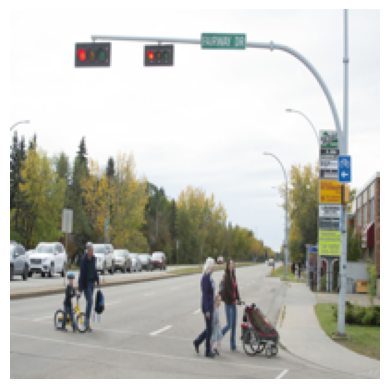

In [ ]:
img_url = 'https://scontent.fsou1-1.fna.fbcdn.net/v/t1.6435-9/126060960_10158715492454371_4912334057037758029_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=7f8c78&_nc_ohc=JziR27ro_C4AX_Ys7Y4&_nc_ht=scontent.fsou1-1.fna&oh=00_AfCwBYhDkAHJwnMc85CJ5xO_h_r5k_C0Xp903BAtEZrr-A&oe=65AD7D6E'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 1.000
It's a red


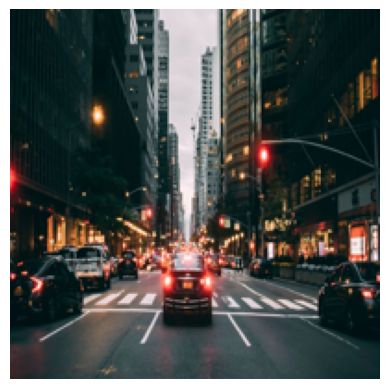

In [ ]:
img_url = 'https://i.pinimg.com/originals/87/b7/ad/87b7ad9cfa34c6ebb214e8aa822a80fd.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 28ms/step
prediction: 0.000
It's a green


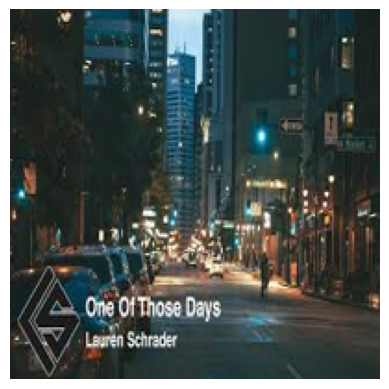

In [ ]:
img_url = 'https://i.ytimg.com/vi/Bzg65SuEmzA/mqdefault.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 0.000
It's a green


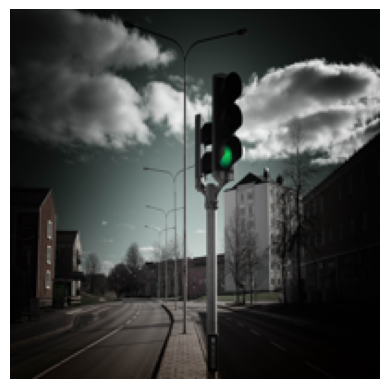

In [ ]:
img_url = 'https://get.wallhere.com/photo/photography-road-building-clouds-street-light-traffic-lights-bus-stop-green-light-urban-1868543.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 0.000
It's a green


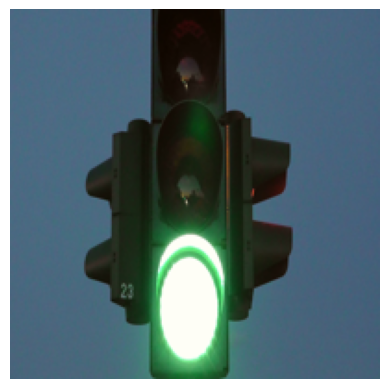

In [ ]:
img_url = 'https://get.pxhere.com/photo/light-road-traffic-green-drive-street-light-lamp-lighting-decor-traffic-light-road-sign-light-fixture-shape-traffic-lights-light-signal-rules-of-the-road-traffic-signal-signal-lamp-atmosphere-of-earth-signaling-device-1251887.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 27ms/step
prediction: 1.000
It's a red


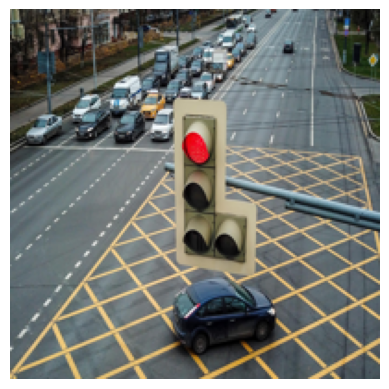

In [ ]:
img_url = 'https://cdnstatic.rg.ru/uploads/images/189/23/63/RIAN_3227866.HR.ru.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 28ms/step
prediction: 0.000
It's a green


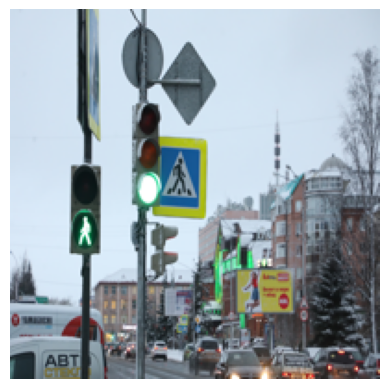

In [ ]:
img_url = 'http://static.ngs.ru/news/99/preview/72cef6202d98ad84ec453a11d6e1df4108d1dd93_2560.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 1.000
It's a red


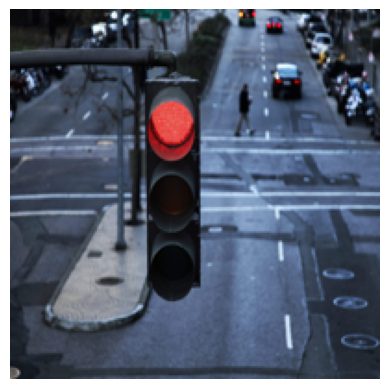

In [ ]:
img_url = 'https://i.insider.com/60eabe8a61b8600019f16816?width=2000&format=jpeg&auto=webp'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 1.000
It's a red


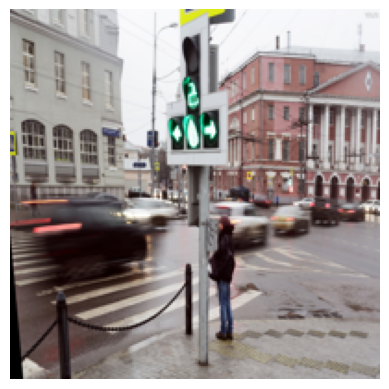

In [ ]:
img_url = 'https://files.vm.ru/photo/vecherka/2016/02/doc6ogmbigqxg71ebulhye.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 24ms/step
prediction: 0.000
It's a green


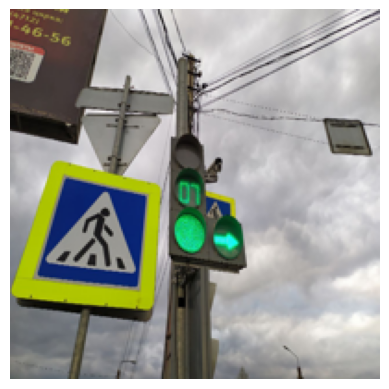

In [ ]:
img_url = 'https://sun9-71.userapi.com/impg/06dCbRZrAn7WmW2Dw0u994KXH2xlxgwk-1zG9w/OL5JxLVs_Yg.jpg?size=1280x960&quality=96&sign=5e79c2c9a610f04798e3a63764800b86&c_uniq_tag=IHfxYZccoRgQ74jC5h5OqrepptDqusVpODIkfX7G4c0&type=album'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 0.000
It's a green


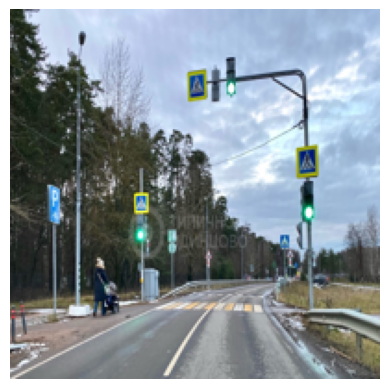

In [ ]:
img_url = 'https://sun9-41.userapi.com/impg/f6jG-2mNDcRHwzeTo3YpMczUDhBknAdsft_PVg/WBB11NTOAWk.jpg?size=1920x1294&quality=96&sign=782382c602cb9d337b257c4dcc059bd4&c_uniq_tag=L1GtLrCDNDha86DOSRxx076T1_xRu6iq8dBOvzQX0A4&type=album'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
prediction: 1.000
It's a red


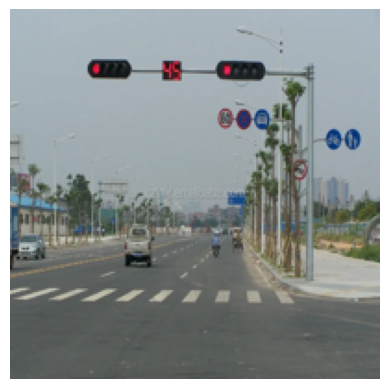

In [ ]:
img_url = 'https://sc02.alicdn.com/kf/HTB1aGUELpXXXXX_XFXXq6xXFXXXO/224444267/HTB1aGUELpXXXXX_XFXXq6xXFXXXO.jpg'
predict_traffic_light(img_url, model)

image shape: (1, 200, 200, 3)
1/1 [==============================] - 0s 24ms/step
prediction: 0.000
It's a green


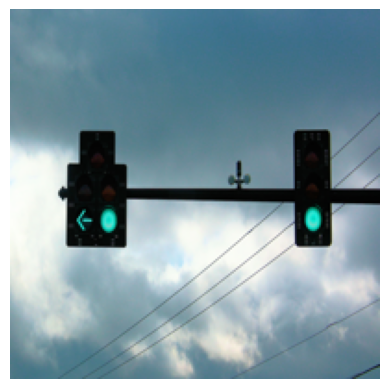

In [ ]:
img_url = 'https://i.imgur.com/oKw15f7.jpg'
predict_traffic_light(img_url, model)

In [ ]:
######################################################################
# CNN model
# Var-2
# Improve accuracy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


# Added seed
seed_value = 79
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

train_dir = os.path.join('traffic', 'Train')
test_dir = os.path.join('traffic', 'Test')

data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
)
training_set = data_augmentation.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    class_mode='binary',
)

validation_set = data_augmentation.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

##################
checkpoint_path = "models//best_model_format"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
#################

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    callbacks=[checkpoint_callback, early_stopping]
)



# history = model.fit(training_set, validation_data=validation_set, epochs=30, steps_per_epoch=len(training_set))
# history = model.fit(
#     training_set, validation_data=validation_set, epochs=30,
#     callbacks=[checkpoint_callback]  # Include the ModelCheckpoint callback
# )
# best_model = tf.keras.models.load_model(checkpoint_path)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 1.7817 - accuracy: 0.4500
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to models\best_model_format
INFO:tensorflow:Assets written to: models\best_model_format\assets


INFO:tensorflow:Assets written to: models\best_model_format\assets


5/5 [==============================] - 10s 2s/step - loss: 1.7817 - accuracy: 0.4500 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 0.7000 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
5/5 [==============================] - 4s 843ms/step - loss: 0.7000 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5312
Epoch 3: val_accuracy did not improve from 0.50000
5/5 [==============================] - 4s 878ms/step - loss: 0.6940 - accuracy: 0.5312 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.6187
Epoch 4: val_accuracy did not improve from 0.50000
5/5 [==============================] - 4s 843ms/step - loss: 0.6626 - accuracy: 0.6187 - val_loss: 0.8112 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - ETA: 0s

INFO:tensorflow:Assets written to: models\best_model_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.4986 - accuracy: 0.7812 - val_loss: 0.6602 - val_accuracy: 0.6250
Epoch 9/30
5/5 [==============================] - ETA: 0s - loss: 0.4503 - accuracy: 0.7937
Epoch 9: val_accuracy did not improve from 0.62500
5/5 [==============================] - 4s 835ms/step - loss: 0.4503 - accuracy: 0.7937 - val_loss: 0.7006 - val_accuracy: 0.6250
Epoch 10/30
5/5 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.7688
Epoch 10: val_accuracy did not improve from 0.62500
5/5 [==============================] - 5s 913ms/step - loss: 0.4857 - accuracy: 0.7688 - val_loss: 0.6980 - val_accuracy: 0.6250
Epoch 11/30
5/5 [==============================] - ETA: 0s - loss: 0.5213 - accuracy: 0.7437
Epoch 11: val_accuracy improved from 0.62500 to 0.77500, saving model to models\best_model_format
INFO:tensorflow:Assets written to: models\best_model_format\assets


INFO:tensorflow:Assets written to: models\best_model_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.5213 - accuracy: 0.7437 - val_loss: 0.5288 - val_accuracy: 0.7750
Epoch 12/30
5/5 [==============================] - ETA: 0s - loss: 0.4621 - accuracy: 0.7437
Epoch 12: val_accuracy did not improve from 0.77500
5/5 [==============================] - 4s 871ms/step - loss: 0.4621 - accuracy: 0.7437 - val_loss: 0.5639 - val_accuracy: 0.7500
Epoch 13/30
5/5 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.8500
Epoch 13: val_accuracy did not improve from 0.77500
5/5 [==============================] - 5s 909ms/step - loss: 0.4322 - accuracy: 0.8500 - val_loss: 0.5789 - val_accuracy: 0.7000
Epoch 14/30
5/5 [==============================] - ETA: 0s - loss: 0.3494 - accuracy: 0.8687
Epoch 14: val_accuracy did not improve from 0.77500
5/5 [==============================] - 4s 890ms/step - loss: 0.3494 - accuracy: 0.8687 - val_loss: 0.5760 - val_accuracy: 0.7500
Epoch 15/30
5/5 [==============================] - E

INFO:tensorflow:Assets written to: models\best_model_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.3262 - accuracy: 0.8562 - val_loss: 0.4234 - val_accuracy: 0.8000
Epoch 16/30
5/5 [==============================] - ETA: 0s - loss: 0.2894 - accuracy: 0.8938
Epoch 16: val_accuracy did not improve from 0.80000
5/5 [==============================] - 4s 880ms/step - loss: 0.2894 - accuracy: 0.8938 - val_loss: 0.5588 - val_accuracy: 0.7500
Epoch 17/30
5/5 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.8938
Epoch 17: val_accuracy did not improve from 0.80000
5/5 [==============================] - 5s 959ms/step - loss: 0.2590 - accuracy: 0.8938 - val_loss: 0.4119 - val_accuracy: 0.8000
Epoch 18/30
5/5 [==============================] - ETA: 0s - loss: 0.2683 - accuracy: 0.9000
Epoch 18: val_accuracy did not improve from 0.80000
5/5 [==============================] - 5s 927ms/step - loss: 0.2683 - accuracy: 0.9000 - val_loss: 0.3906 - val_accuracy: 0.8000
Epoch 19/30
5/5 [==============================] - E

INFO:tensorflow:Assets written to: models\best_model_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.1985 - accuracy: 0.9187 - val_loss: 0.3356 - val_accuracy: 0.8750
Epoch 21/30
5/5 [==============================] - ETA: 0s - loss: 0.1653 - accuracy: 0.9312
Epoch 21: val_accuracy did not improve from 0.87500
5/5 [==============================] - 5s 901ms/step - loss: 0.1653 - accuracy: 0.9312 - val_loss: 0.3526 - val_accuracy: 0.7750
Epoch 22/30
5/5 [==============================] - ETA: 0s - loss: 0.1799 - accuracy: 0.9312
Epoch 22: val_accuracy did not improve from 0.87500
5/5 [==============================] - 5s 893ms/step - loss: 0.1799 - accuracy: 0.9312 - val_loss: 0.3178 - val_accuracy: 0.8500
Epoch 23/30
5/5 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.9438
Epoch 23: val_accuracy improved from 0.87500 to 0.90000, saving model to models\best_model_format
INFO:tensorflow:Assets written to: models\best_model_format\assets


INFO:tensorflow:Assets written to: models\best_model_format\assets


5/5 [==============================] - 7s 1s/step - loss: 0.1491 - accuracy: 0.9438 - val_loss: 0.2633 - val_accuracy: 0.9000
Epoch 24/30
5/5 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9812
Epoch 24: val_accuracy did not improve from 0.90000
5/5 [==============================] - 4s 841ms/step - loss: 0.0945 - accuracy: 0.9812 - val_loss: 0.2510 - val_accuracy: 0.8500
Epoch 25/30
5/5 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9500
Epoch 25: val_accuracy did not improve from 0.90000
5/5 [==============================] - 5s 903ms/step - loss: 0.1431 - accuracy: 0.9500 - val_loss: 0.4324 - val_accuracy: 0.9000
Epoch 26/30
5/5 [==============================] - ETA: 0s - loss: 0.4716 - accuracy: 0.8625
Epoch 26: val_accuracy did not improve from 0.90000
5/5 [==============================] - 4s 884ms/step - loss: 0.4716 - accuracy: 0.8625 - val_loss: 0.3535 - val_accuracy: 0.8250
Epoch 27/30
5/5 [==============================] - E

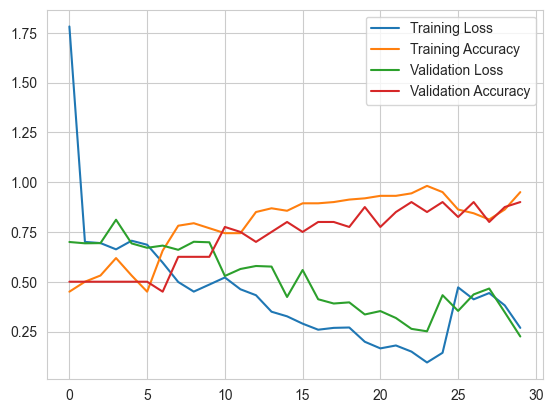

2/2 [==============================] - 2s 66ms/step - loss: 0.2370 - accuracy: 0.9250
[0.23697149753570557, 0.925000011920929]


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

evaluation_results = model.evaluate(validation_set)
print(evaluation_results)

In [ ]:
# 1. loss: 0.6567 - accuracy: 0.9000
# 2. loss: 0.2370 - accuracy: 0.9250
# 3. loss: 0.1738 - accuracy: 0.9250

In [ ]:
######################################################################
# CNN model
# Var-3
# Improve accuracy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.optimizers import Adam


In [ ]:
from keras.callbacks import ModelCheckpoint

# Added seed
seed_value = 79
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

train_dir = os.path.join('traffic', 'Train')
test_dir = os.path.join('traffic', 'Test')

data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
)
training_set = data_augmentation.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    class_mode='binary',
)

validation_set = data_augmentation.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Regularization Techniques
model.add(Dropout(0.5))  # Adding additional dropout
# best_model02 (loss: 0.1738 - accuracy: 0.9250)

model.add(Dense(1, activation='sigmoid'))



# optimizer = Adam(learning_rate=0.000001)  # Adjust learning rate as needed
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

##################
# model.save("models//best_model_format")
checkpoint_path = "models//best_model03_format"
# best_model02 (loss: 0.1738 - accuracy: 0.9250)
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # Choose the validation metric to monitor (e.g., 'val_accuracy', 'val_loss')
    save_best_only=True,
    mode='max',  # Use 'max' for accuracy, 'min' for loss
    verbose=1
)
#################

# history = model.fit(training_set, validation_data=validation_set, epochs=30, steps_per_epoch=len(training_set))

history = model.fit(
    training_set,  # Replace with your training data
    validation_data=validation_set,  # Replace with your validation data
    epochs=30,
    callbacks=[checkpoint_callback]  # Include the ModelCheckpoint callback
)
best_model = tf.keras.models.load_model(checkpoint_path)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 1.5398 - accuracy: 0.4375
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to models\best_model02_format
INFO:tensorflow:Assets written to: models\best_model02_format\assets


INFO:tensorflow:Assets written to: models\best_model02_format\assets


5/5 [==============================] - 7s 1s/step - loss: 1.5398 - accuracy: 0.4375 - val_loss: 0.7543 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.5063
Epoch 2: val_accuracy did not improve from 0.50000
5/5 [==============================] - 4s 814ms/step - loss: 0.6955 - accuracy: 0.5063 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5875
Epoch 3: val_accuracy did not improve from 0.50000
5/5 [==============================] - 4s 839ms/step - loss: 0.6768 - accuracy: 0.5875 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 0.6554 - accuracy: 0.6625
Epoch 4: val_accuracy did not improve from 0.50000
5/5 [==============================] - 4s 863ms/step - loss: 0.6554 - accuracy: 0.6625 - val_loss: 0.7023 - val_accuracy: 0.4250
Epoch 5/30
5/5 [==============================] - ETA: 0s 

INFO:tensorflow:Assets written to: models\best_model02_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.6295 - accuracy: 0.6812 - val_loss: 0.6728 - val_accuracy: 0.6250
Epoch 9/30
5/5 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.7063
Epoch 9: val_accuracy improved from 0.62500 to 0.70000, saving model to models\best_model02_format
INFO:tensorflow:Assets written to: models\best_model02_format\assets


INFO:tensorflow:Assets written to: models\best_model02_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.5528 - accuracy: 0.7063 - val_loss: 0.6339 - val_accuracy: 0.7000
Epoch 10/30
5/5 [==============================] - ETA: 0s - loss: 0.5215 - accuracy: 0.8125
Epoch 10: val_accuracy did not improve from 0.70000
5/5 [==============================] - 5s 985ms/step - loss: 0.5215 - accuracy: 0.8125 - val_loss: 0.6654 - val_accuracy: 0.5750
Epoch 11/30
5/5 [==============================] - ETA: 0s - loss: 0.4930 - accuracy: 0.7875
Epoch 11: val_accuracy did not improve from 0.70000
5/5 [==============================] - 5s 1s/step - loss: 0.4930 - accuracy: 0.7875 - val_loss: 0.5827 - val_accuracy: 0.7000
Epoch 12/30
5/5 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.7875
Epoch 12: val_accuracy did not improve from 0.70000
5/5 [==============================] - 5s 1s/step - loss: 0.4835 - accuracy: 0.7875 - val_loss: 0.6815 - val_accuracy: 0.5750
Epoch 13/30
5/5 [==============================] - ETA: 0s

INFO:tensorflow:Assets written to: models\best_model02_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.4973 - accuracy: 0.7688 - val_loss: 0.5189 - val_accuracy: 0.8250
Epoch 14/30
5/5 [==============================] - ETA: 0s - loss: 0.3979 - accuracy: 0.8125
Epoch 14: val_accuracy did not improve from 0.82500
5/5 [==============================] - 5s 1s/step - loss: 0.3979 - accuracy: 0.8125 - val_loss: 0.5372 - val_accuracy: 0.7000
Epoch 15/30
5/5 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8438
Epoch 15: val_accuracy did not improve from 0.82500
5/5 [==============================] - 5s 1s/step - loss: 0.3677 - accuracy: 0.8438 - val_loss: 0.5235 - val_accuracy: 0.7500
Epoch 16/30
5/5 [==============================] - ETA: 0s - loss: 0.3471 - accuracy: 0.8750
Epoch 16: val_accuracy did not improve from 0.82500
5/5 [==============================] - 5s 1s/step - loss: 0.3471 - accuracy: 0.8750 - val_loss: 0.5696 - val_accuracy: 0.6750
Epoch 17/30
5/5 [==============================] - ETA: 0s - 

INFO:tensorflow:Assets written to: models\best_model02_format\assets


5/5 [==============================] - 7s 2s/step - loss: 0.2331 - accuracy: 0.9250 - val_loss: 0.2641 - val_accuracy: 0.9250
Epoch 24/30
5/5 [==============================] - ETA: 0s - loss: 0.1563 - accuracy: 0.9312
Epoch 24: val_accuracy did not improve from 0.92500
5/5 [==============================] - 5s 974ms/step - loss: 0.1563 - accuracy: 0.9312 - val_loss: 0.3015 - val_accuracy: 0.9000
Epoch 25/30
5/5 [==============================] - ETA: 0s - loss: 0.1158 - accuracy: 0.9625
Epoch 25: val_accuracy did not improve from 0.92500
5/5 [==============================] - 5s 1s/step - loss: 0.1158 - accuracy: 0.9625 - val_loss: 0.2818 - val_accuracy: 0.8500
Epoch 26/30
5/5 [==============================] - ETA: 0s - loss: 0.1330 - accuracy: 0.9563
Epoch 26: val_accuracy did not improve from 0.92500
5/5 [==============================] - 6s 1s/step - loss: 0.1330 - accuracy: 0.9563 - val_loss: 0.4738 - val_accuracy: 0.8750
Epoch 27/30
5/5 [==============================] - ETA: 0s

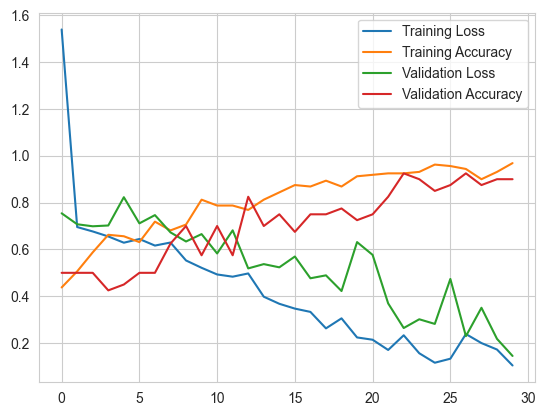

2/2 [==============================] - 0s 72ms/step - loss: 0.1738 - accuracy: 0.9250
[0.17381802201271057, 0.925000011920929]


In [ ]:
# Regularization Techniques
model.add(Dropout(0.5))  # Adding additional dropout
# best_model02 (loss: 0.1738 - accuracy: 0.9250)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

evaluation_results = model.evaluate(validation_set)
print(evaluation_results)

In [ ]:
# 1. loss: 0.6567 - accuracy: 0.9000
# 2. loss: 0.3045 - accuracy: 0.8250
# 3. loss: 0.1738 - accuracy: 0.9250